In [21]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

In [29]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
# отсутствующих значений в таблице нет

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
print('Значение медианы для satisfaction_level: ', statistics.median(data['satisfaction_level']))
print('Значение моды для satisfaction_level: ', statistics.mode(data['satisfaction_level']))
print('Среднее значение для satisfaction_level: ', statistics.mean(data['satisfaction_level']))
print('Минимальное значение для satisfaction_level: ', min(data['satisfaction_level']))
print('Максимальное значение для satisfaction_level: ', max(data['satisfaction_level']))  
print('Среднеквадратичное отклонение для satisfaction_level: ', statistics.pstdev(data['satisfaction_level']))

Значение медианы для satisfaction_level:  0.64
Значение моды для satisfaction_level:  0.1
Среднее значение для satisfaction_level:  0.6128335222348157
Минимальное значение для satisfaction_level:  0.09
Максимальное значение для satisfaction_level:  1.0
Среднеквадратичное отклонение для satisfaction_level:  0.2486223626820733


In [10]:
print('Значение медианы для last_evaluation: ', statistics.median(data['last_evaluation']))
print('Значение моды для last_evaluation: ', statistics.mode(data['last_evaluation']))
print('Среднее значение для last_evaluation: ', statistics.mean(data['last_evaluation']))
print('Минимальное значение для last_evaluation: ', min(data['last_evaluation']))
print('Максимальное значение для last_evaluation: ', max(data['last_evaluation']))  
print('Среднеквадратичное отклонение для last_evaluation: ', statistics.pstdev(data['last_evaluation']))

Значение медианы для last_evaluation:  0.72
Значение моды для last_evaluation:  0.55
Среднее значение для last_evaluation:  0.7161017401160077
Минимальное значение для last_evaluation:  0.36
Максимальное значение для last_evaluation:  1.0
Среднеквадратичное отклонение для last_evaluation:  0.1711634045107436


In [11]:
print('Значение медианы для number_project: ', statistics.median(data['number_project']))
print('Значение моды для number_project: ', statistics.mode(data['number_project']))
print('Среднее значение для number_project: ', statistics.mean(data['number_project']))
print('Минимальное значение для number_project: ', min(data['number_project']))
print('Максимальное значение для number_project: ', max(data['number_project']))  
print('Среднеквадратичное отклонение для number_project: ', statistics.pstdev(data['number_project']))

Значение медианы для number_project:  4
Значение моды для number_project:  4
Среднее значение для number_project:  3.80305353690246
Минимальное значение для number_project:  2
Максимальное значение для number_project:  7
Среднеквадратичное отклонение для number_project:  1.2325512654823438


In [13]:
# для столбца average_montly_hours нельзя посчитать моду, так как в нем есть только два одинаковых значения

print('Значение медианы для average_montly_hours: ', statistics.median(data['average_montly_hours']))
print('Среднее значение для average_montly_hours: ', statistics.mean(data['average_montly_hours']))
print('Минимальное значение для average_montly_hours: ', min(data['average_montly_hours']))
print('Максимальное значение для average_montly_hours: ', max(data['average_montly_hours']))  
print('Среднеквадратичное отклонение для average_montly_hours: ', statistics.pstdev(data['average_montly_hours']))

Значение медианы для average_montly_hours:  200
Среднее значение для average_montly_hours:  201.0503366891126
Минимальное значение для average_montly_hours:  96
Максимальное значение для average_montly_hours:  310
Среднеквадратичное отклонение для average_montly_hours:  49.94143446256218


In [14]:
print('Значение медианы для time_spend_company: ', statistics.median(data['time_spend_company']))
print('Значение моды для time_spend_company: ', statistics.mode(data['time_spend_company']))
print('Среднее значение для time_spend_company: ', statistics.mean(data['time_spend_company']))
print('Минимальное значение для time_spend_company: ', min(data['time_spend_company']))
print('Максимальное значение для time_spend_company: ', max(data['time_spend_company']))  
print('Среднеквадратичное отклонение для time_spend_company: ', statistics.pstdev(data['time_spend_company']))

Значение медианы для time_spend_company:  3
Значение моды для time_spend_company:  3
Среднее значение для time_spend_company:  3.498233215547703
Минимальное значение для time_spend_company:  2
Максимальное значение для time_spend_company:  10
Среднеквадратичное отклонение для time_spend_company:  1.4600875552715114


In [20]:
# в следующих трех столбцах встречаются только 0 и 1 (категориальные переменные)

data['Work_accident'].value_counts().head(10)

0    12830
1     2169
Name: Work_accident, dtype: int64

In [15]:
print('Значение медианы для Work_accident: ', statistics.median(data['Work_accident']))
print('Значение моды для Work_accident: ', statistics.mode(data['Work_accident']))
print('Среднее значение для Work_accident: ', statistics.mean(data['Work_accident']))
print('Минимальное значение для Work_accident: ', min(data['Work_accident']))
print('Максимальное значение для Work_accident: ', max(data['Work_accident']))  
print('Среднеквадратичное отклонение для Work_accident: ', statistics.pstdev(data['Work_accident']))

Значение медианы для Work_accident:  0
Значение моды для Work_accident:  0
Среднее значение для Work_accident:  0.1446096406427095
Минимальное значение для Work_accident:  0
Максимальное значение для Work_accident:  1
Среднеквадратичное отклонение для Work_accident:  0.3517068274513532


In [21]:
data['left'].value_counts().head(10)

0    11428
1     3571
Name: left, dtype: int64

In [16]:
print('Значение медианы для left: ', statistics.median(data['left']))
print('Значение моды для left: ', statistics.mode(data['left']))
print('Среднее значение для left: ', statistics.mean(data['left']))
print('Минимальное значение для left: ', min(data['left']))
print('Максимальное значение для left: ', max(data['left']))  
print('Среднеквадратичное отклонение для left: ', statistics.pstdev(data['left']))

Значение медианы для left:  0
Значение моды для left:  0
Среднее значение для left:  0.2380825388359224
Минимальное значение для left:  0
Максимальное значение для left:  1
Среднеквадратичное отклонение для left:  0.42590990072709495


In [22]:
data['promotion_last_5years'].value_counts().head(10)

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [17]:
print('Значение медианы для promotion_last_5years: ', statistics.median(data['promotion_last_5years']))
print('Значение моды для promotion_last_5years: ', statistics.mode(data['promotion_last_5years']))
print('Среднее значение для promotion_last_5years: ', statistics.mean(data['promotion_last_5years']))
print('Минимальное значение для promotion_last_5years: ', min(data['promotion_last_5years']))
print('Максимальное значение для promotion_last_5years: ', max(data['promotion_last_5years']))  
print('Среднеквадратичное отклонение для promotion_last_5years: ', statistics.pstdev(data['promotion_last_5years']))

Значение медианы для promotion_last_5years:  0
Значение моды для promotion_last_5years:  0
Среднее значение для promotion_last_5years:  0.021268084538969265
Минимальное значение для promotion_last_5years:  0
Максимальное значение для promotion_last_5years:  1
Среднеквадратичное отклонение для promotion_last_5years:  0.14427665479561314


In [19]:
print('Значение моды для sales: ', statistics.mode(data['sales']))

Значение моды для sales:  sales


In [18]:
print('Значение моды для salary: ', statistics.mode(data['salary']))

Значение моды для salary:  low


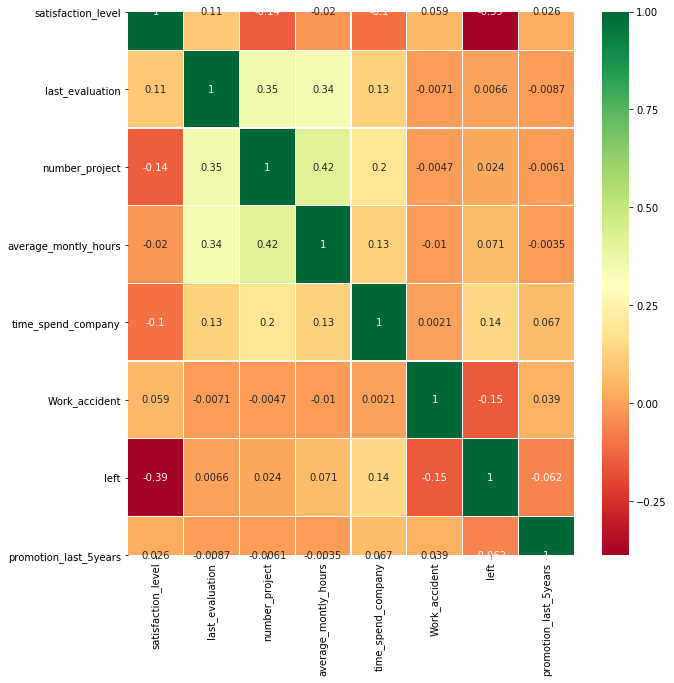

In [36]:
# построим матрицу коррелляций
# из матрицы можно сделать вывод, что сильной коррелляции не наблюдается. Наибольшая коррелляция в столбцах - number_project и
# average_montly_hours, number_project и last_evaluation, average_montly_hours и last_evaluation, небольшая обратная коррелляция
# между столбцами left и satisfaction_level.

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

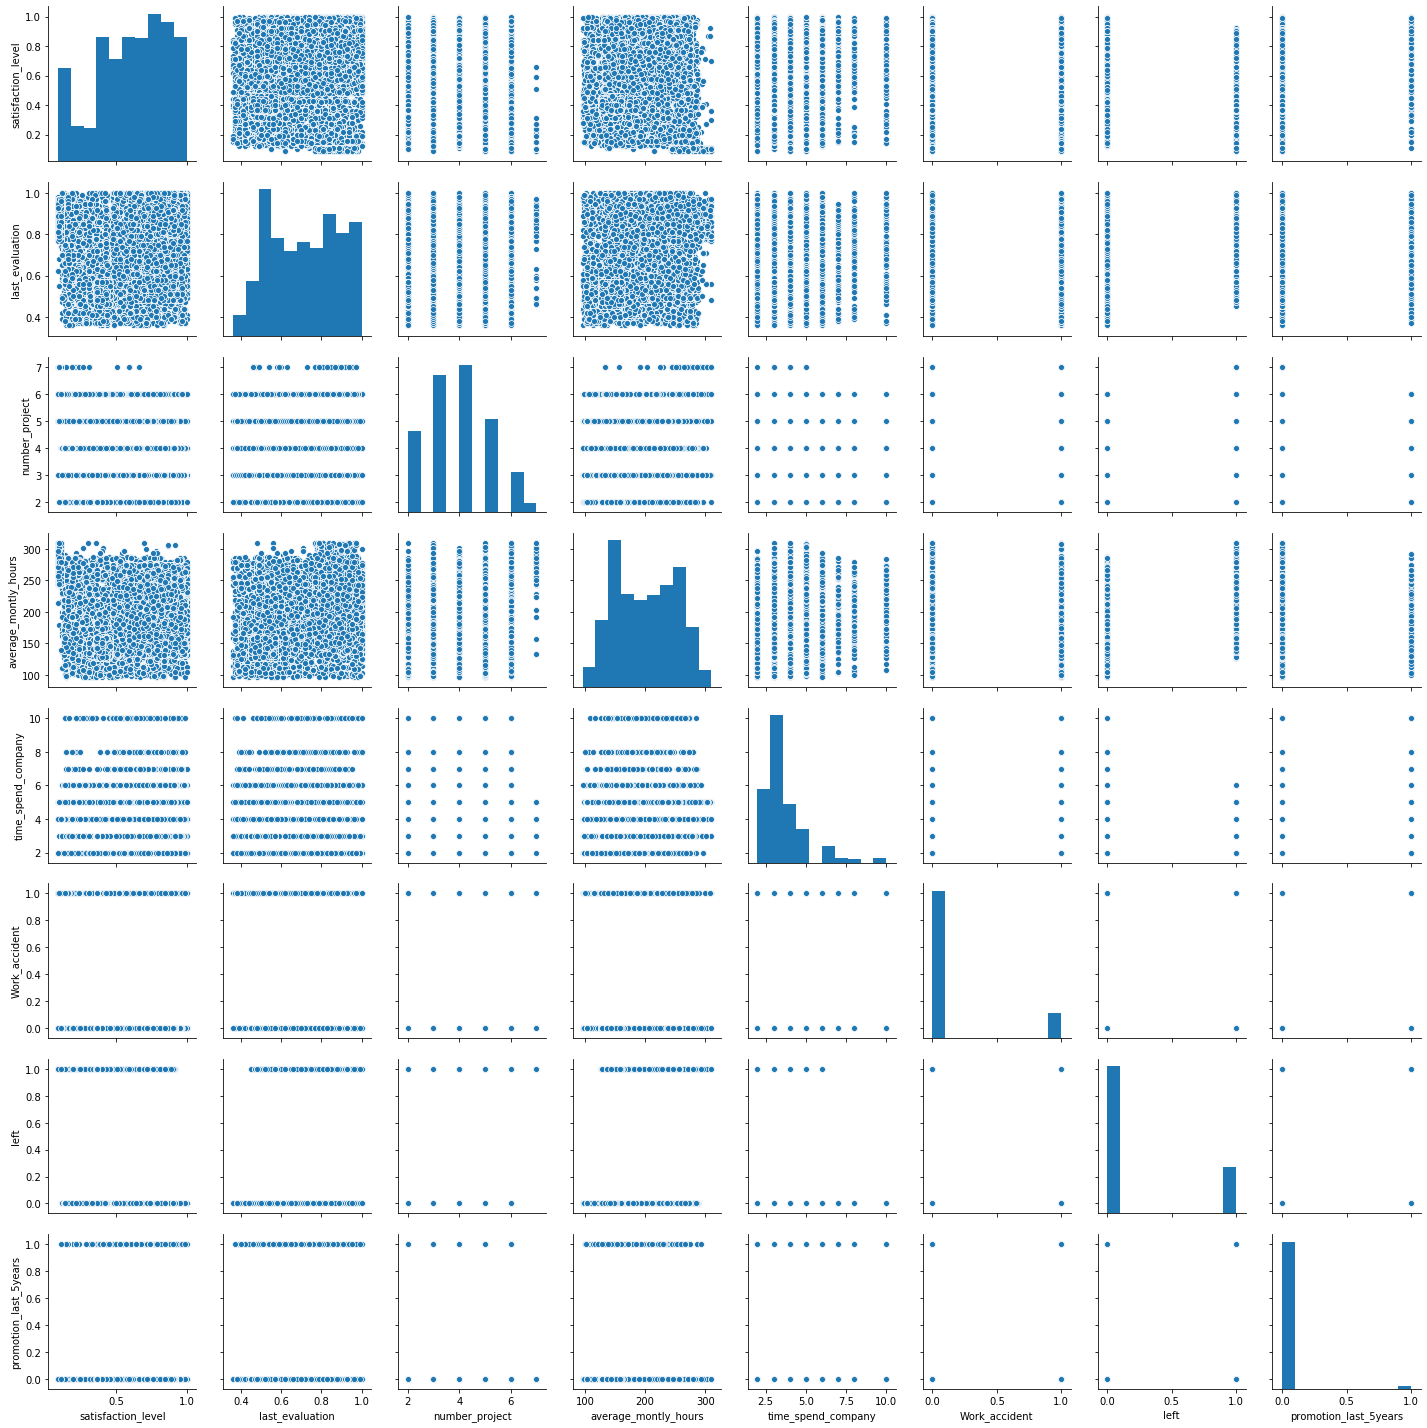

In [61]:
sns.pairplot(data, vars = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'], kind = 'scatter')                   
                         

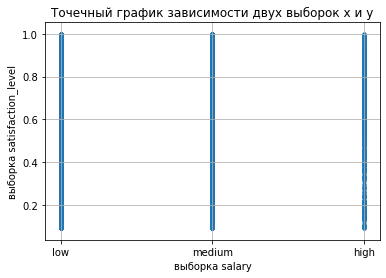

In [40]:
# Посмотрим зависимость уровня удовлетворенности от уровня зарплаты. Как видно на графике, уровень зарплаты не влияет на
# уровень удовлетворенности. Можно налюдать, что, как сотрудники с низкой заработной платой имеют высокий уровень удовлетворенности
# так и сотрудники с высокой зарплатой - низкий уровень удовлетворенности.

plt.xlabel('выборка salary')
plt.ylabel('выборка satisfaction_level')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(data['salary'], data['satisfaction_level'], marker='.')

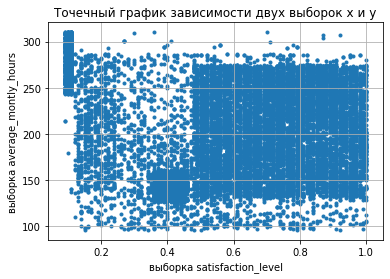

In [42]:
# Посмотрим на графике зависимость уровня удовлетворенности от количества часов в месяц. В целом, можно сказать, что особой 
# зависимости не наблюдается, но все же можно сделать вывод, что сотрудники с часами от 125 до 275 имеют более высокие оценки
# удовлетворенности

plt.xlabel('выборка satisfaction_level')
plt.ylabel('выборка average_montly_hours')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(data['satisfaction_level'], data['average_montly_hours'], marker='.')

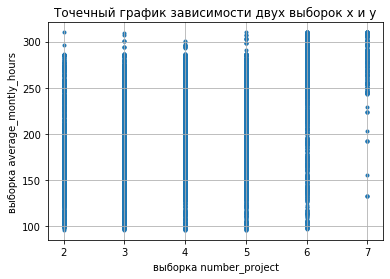

In [43]:
# Построим зависимость номера проекта от средних часов в месяц. По графику можно сделать вывод, что над 7 проектом работают 
# больше всего часов(от 250 и выше), над остальными проектами - примерно одинаково.

plt.xlabel('выборка number_project')
plt.ylabel('выборка average_montly_hours')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(data['number_project'], data['average_montly_hours'], marker='.')

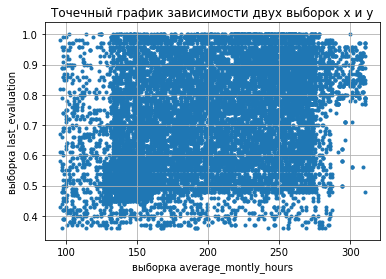

In [46]:
# построим график зависимости средних часов в месяц и последней оценкой. Из графика можно сделать вывод, что сотрудники с часами
# 300 имеют высокие последние оценки, у сотрудников с часами меньше 125 меньше высоких оценок, оценку 1 поставили сотрадники с
# часами от 125 до 275.

plt.xlabel('выборка average_montly_hours')
plt.ylabel('выборка last_evaluation')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(data['average_montly_hours'], data['last_evaluation'], marker='.')

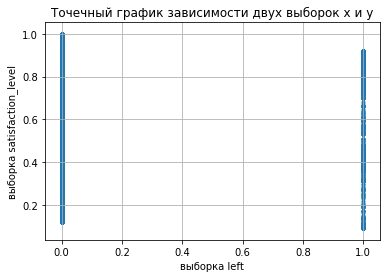

In [47]:
# построим график зависимости уволенных сотрудников и уровнем удовлетворенности. По графику можно сделать вывод, что
# уволенные сотрудники имеют уровень удовлетворенности от 0,05 до 0,9, а неуволенные - от 0,1 до 1.

plt.xlabel('выборка left')
plt.ylabel('выборка satisfaction_level')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(data['left'], data['satisfaction_level'], marker='.')

In [3]:
# проверим, зависят ли две переменные с помощью ранговой коррелляции Спирмена
# H0 - две переменные независимы
# H1 - между переменным существует взаимосвязь 
# средние часы в месяц имеют зависимость с номером проекта

from scipy.stats import spearmanr

stat, p = spearmanr(data['average_montly_hours'], data['number_project'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.398, p=0.000
Probably dependent


In [4]:
# средние часы в месяц имеют зависимость с последней оценкой

from scipy.stats import kendalltau
stat, p = kendalltau(data['average_montly_hours'], data['last_evaluation'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.235, p=0.000
Probably dependent


In [5]:
# рассчитаем, сколько сотрудников работают в каждом департаменте

data['sales'].value_counts().head(20)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [6]:
# найдем распределение сотрудников по зарплатам

data['salary'].value_counts().head()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [16]:
# найдем распределение сотрудников по зарплатам совместно с департаментами

data_1 = data.groupby(['salary', 'sales']).count().head(40)
data_2 = data_1['satisfaction_level'].head(40)
data_2

salary  sales      
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
Name: satisfaction_level, dtype: int64

In [7]:
# рассчитаем сколько сотрудников покинули компанию (1 - это покинувшие)

data['left'].value_counts().head(10)

0    11428
1     3571
Name: left, dtype: int64

Проверим гипотезу, что уволенные и неуволенные сотрудники работали над одним проектом

In [31]:
left_ = data[data['left']==1]['number_project']

not_left = data[data['left']==0]['number_project']

print(stats.ttest_ind(left_, not_left))

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)


p-value равно 0.003, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между проектами уволенных и неуволенных сотрудников(т.е. они работали над разными проектами).

In [ ]:
Проверим гипотезу, что средние часы в месяц у уволенных и неуволенных сотрудников одинаковые

In [32]:
left_ = data[data['left']==1]['average_montly_hours']

not_left = data[data['left']==0]['average_montly_hours']

print(stats.ttest_ind(left_, not_left))

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)


p-value равно 2.311, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между средними часами в месяц уволенных и неуволенных сотрудников.

In [ ]:
Проверим гипотезу, что стаж в компании у уволенных и неуволенных сотрудников одинаков

In [33]:
left_ = data[data['left']==1]['time_spend_company']

not_left = data[data['left']==0]['time_spend_company']

print(stats.ttest_ind(left_, not_left))

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)


p-value равно 4.2, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между стажем работы уволенных и неуволенных сотрудников.